In [8]:
import database
import register
import cv2
import keras

In [2]:
host_name = 'localhost'
user_name = 'root'
password = 'Pattern'
database_name =  'DARK'


db = database.Database(host_name, user_name, password)
db.create_db(database_name)
db.connect_db(database_name)

Database Created successfully


In [11]:
variables = "(id int not null, name varchar(50), gender char(6), address varchar(30),\
                position varchar(20), employment_date date, resumption_date date,\
                salary_per_hr float, daily_work_hrs int, primary key (id))"
db.create_table(name = 'workers_info', features = variables, database = 'dark')

company_register = "(id int not null, date date, name varchar(50), \
                     time_in time, time_out time)"
db.create_table(name = 'register', features = company_register, database = 'dark')

new_connection = db.connect_db(database_name)
cursor = new_connection.cursor(buffered=True)

Table created succeccfully
Table created succeccfully


In [4]:
def model(path, classifier_path):
    frmodel = keras.models.load_model(path)
    classifier = cv2.CascadeClassifier(classifier_path)
    return frmodel, classifier


model_path = './converted.h5'
classifier_path = "C:/Users/Godwin/Documents/Workflow/opencv/chapter3/\
                    3923_04/cameo/cascades/haarcascade_frontalface_alt.xml"

frmodel, classifier = model(model_path, classifier_path)
woker_cls = register.worker(new_connection,cursor,frmodel, classifier)

c:\Users\Godwin\.conda\envs\Tensorflow\lib\site-packages\keras\layers\core\lambda_layer.py:327: UserWarning: inception_resnet_v1 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [12]:
woker_cls = register.worker(new_connection,cursor,frmodel, classifier)
woker_cls.register_worker()

1/1 [==============================] - 0s 213ms/step
(160, 160, 3)
(1, 128)
Successully added the worker's record


1/1 [==============================] - 0s 211ms/step
(160, 160, 3)
(1, 128)
Successully updated the record


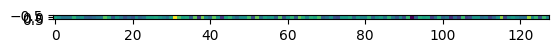

In [14]:
woker_cls.sign_out()